# Sort bills according to their size and take top 50 (largest) bills.


In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install morfeusz2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 27.5 MB/s 


In [ ]:
!python -m spacy download pl_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [ ]:
from spacy.tokenizer import Tokenizer
import spacy
import regex

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import shutil


dst_path = "./n82_ustawy"

dir_name = '../content/drive/MyDrive/Nauka/data science/ustawy/'
list_of_files = filter(os.path.isfile, glob.glob(dir_name + '*') )

# Sort list of files in directory by size 
list_of_files = sorted( list_of_files,key =  lambda x: os.stat(x).st_size)

list_of_files = list_of_files[-50:]
print(len(list_of_files))

for elem in list_of_files:
    file_size  = os.stat(elem).st_size 
    shutil.copy(elem, dst_path + elem.split("ustawy")[1])

    print(file_size, ' -->', elem)   


50
133784  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2001_1444.txt
136489  --> ../content/drive/MyDrive/Nauka/data science/ustawy/1997_153.txt
141328  --> ../content/drive/MyDrive/Nauka/data science/ustawy/1996_496.txt
142132  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2001_92.txt
143601  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2001_906.txt
148194  --> ../content/drive/MyDrive/Nauka/data science/ustawy/1998_602.txt
148449  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2003_2256.txt
149411  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2001_475.txt
150870  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2001_628.txt
152985  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2001_1188.txt
154639  --> ../content/drive/MyDrive/Nauka/data science/ustawy/1996_561.txt
161341  --> ../content/drive/MyDrive/Nauka/data science/ustawy/2001_1438.txt
163118  --> ../content/drive/MyDrive/Nauka/data science/ustawy/1996_460.txt
168282

##Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive words starting with a capital letter 

In [ ]:
nlp = spacy.load("pl_core_news_sm")
tokenizer = Tokenizer(nlp.vocab)


In [ ]:
laws_tokens = []
tokens = []

for filename in list_of_files:
    with open(filename, "r", encoding="utf-8") as file:
        act = file.read()
        act = regex.sub(r"\s+", " ", act)
        
        tokens += [token for token in tokenizer(act)]

        laws_tokens += [token.text for token in tokenizer(act)]


# old_tokens_list = tokens_list


In [ ]:
import re
split_words = []
for my_str in laws_tokens:
    result = re.findall(r"[\w']+|[.,!?;]", my_str)
    split_words += result
    

split_words

['Dz',
 '.',
 'U',
 '.',
 'z',
 '2001',
 'r',
 '.',
 'Nr',
 '129',
 ',',
 'poz',
 '.',
 '1444',
 'USTAWA',
 'z',
 'dnia',
 '6',
 'września',
 '2001',
 'r',
 '.',
 'o',
 'zmianie',
 'ustawy',
 'Prawo',
 'o',
 'ruchu',
 'drogowym',
 'Art',
 '.',
 '1',
 '.',
 'W',
 'ustawie',
 'z',
 'dnia',
 '20',
 'czerwca',
 '1997',
 'r',
 '.',
 'Prawo',
 'o',
 'ruchu',
 'drogowym',
 'Dz',
 '.',
 'U',
 '.',
 'Nr',
 '98',
 ',',
 'poz',
 '.',
 '602',
 ',',
 'Nr',
 '123',
 ',',
 'poz',
 '.',
 '779',
 'i',
 'Nr',
 '160',
 ',',
 'poz',
 '.',
 '1086',
 ',',
 'z',
 '1998',
 'r',
 '.',
 'Nr',
 '106',
 ',',
 'poz',
 '.',
 '668',
 'i',
 'Nr',
 '133',
 ',',
 'poz',
 '.',
 '872',
 ',',
 'z',
 '1999',
 'r',
 '.',
 'Nr',
 '106',
 ',',
 'poz',
 '.',
 '1216',
 ',',
 'z',
 '2000',
 'r',
 '.',
 'Nr',
 '12',
 ',',
 'poz',
 '.',
 '136',
 ',',
 'Nr',
 '43',
 ',',
 'poz',
 '.',
 '483',
 ',',
 'Nr',
 '53',
 ',',
 'poz',
 '.',
 '649',
 'oraz',
 'z',
 '2001',
 'r',
 '.',
 'Nr',
 '27',
 ',',
 'poz',
 '.',
 '298',
 'wprowadza',
 

In [ ]:
import morfeusz2
morf = morfeusz2.Morfeusz()

def analyze_if_upper(token):
    if token[0].islower(): # words that start with a lower case are lower
        return False
    
    analysis = morf.analyse(token) # otherwise we check word base form to obtain an information whether it is uppercase or not
    # print(analysis[0][2][1])
    # print(analysis[0][2][1])
    for a in analysis:
        if a[2][1][0].isupper():
            return True
    return False
  


In [ ]:
analyze_if_upper("Krakowie")

True

In [ ]:
def find_consecutive_word(words):
  found_entry = ""
  is_found = False
  entries = []
  for i in range(1, len(words)):
    if analyze_if_upper(words[i]) and words[i-1] != "." and not is_found:
      is_found = True
    elif is_found:
      if not words[i][0].isupper() or words[i] == ".":
        entries.append(found_entry)
        is_found = False
        found_entry = ""
      
    if is_found:
      found_entry += f" {words[i]}"
    
  return entries

In [ ]:
find_consecutive_word("Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych .".split(" "))

[' Krakowie', ' Polski', ' Stanów Zjednoczonych']


## Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [ ]:
from collections import Counter

In [ ]:
freq_expr = find_consecutive_word(split_words)
Counter(freq_expr).most_common(50)

[(' Art', 2009),
 (' Dz', 1486),
 (' Polskiej', 795),
 (' Obrony Narodowej', 315),
 (' Straży Granicznej', 311),
 (' Unii Europejskiej', 289),
 (' Straży Pożarnej', 234),
 (' Kasy Chorych', 185),
 (' I', 146),
 (' Pracy', 139),
 (' II', 118),
 (' Zdrowia', 109),
 (' Wolnym Handlu EFTA', 103),
 (' P2O5', 100),
 (' Związku Kas', 98),
 (' Maszyny', 95),
 (' Damskie', 93),
 (' Nawóz', 93),
 (' Skarb Państwa', 91),
 (' Opieki Społecznej', 89),
 (' III', 87),
 (' BSWSG', 69),
 (' L', 68),
 (' Głównego Urzędu Ceł', 66),
 (' Dzienniku Urzędowym Rzeczypospolitej Polskiej Monitor Polski', 65),
 (' BSWP', 64),
 (' CN', 60),
 (' Rada Ministrów', 52),
 (' Rzeczpospolita Polska', 52),
 (' Polsce', 51),
 (' PESEL', 50),
 (' Polskiej Dz', 48),
 (' Związku Kas Chorych', 48),
 (' BOR', 47),
 (' Kas Chorych', 44),
 (' Gospodarki', 42),
 (' Warszawie', 39),
 (' Banku Polskiego', 39),
 (' Rzeczpospolitą Polską', 39),
 (' IV', 39),
 (' MgO', 39),
 (' K2O', 39),
 (' Głównego Urzędu Statystycznego', 36),
 (' 

In [ ]:
def get_base(token):
  base_form = ""
  for e in nlp(token):
    base_form += " " + e.lemma_
  return base_form
    


In [ ]:
lemmatized = [get_base(w) for w in freq_expr]
Counter(lemmatized).most_common(50)

[('   artykuł', 2009),
 ('   dz', 1486),
 ('   polski', 816),
 ('   straż graniczny', 317),
 ('   obrona narodowy', 315),
 ('   unia europejski', 296),
 ('   straż pożarny', 239),
 ('   kasa chory', 205),
 ('   i', 146),
 ('   praca', 139),
 ('   II', 118),
 ('   zdrowie', 109),
 ('   związek Kas', 108),
 ('   wolny Handlu EFTA', 103),
 ('   P2O5', 100),
 ('   Maszyna', 95),
 ('   Damski', 93),
 ('   Nawóz', 93),
 ('   skarb państwo', 91),
 ('   opieka społeczny', 89),
 ('   III', 87),
 ('   rada minister', 75),
 ('   BSWSG', 69),
 ('   bank polski', 68),
 ('   L', 68),
 ('   Warszawa', 67),
 ('   główny urząd ceł', 66),
 ('   dziennik urzędowy Rzeczpospolita polski monitor Polska', 65),
 ('   BSWP', 64),
 ('   Polska', 63),
 ('   CN', 60),
 ('   związek Kas chory', 54),
 ('   Rzeczpospolita Polska', 52),
 ('   PESEL', 50),
 ('   polski Dz', 48),
 ('   BOR', 47),
 ('   kas chory', 44),
 ('   Gospodarka', 42),
 ('   rzeczpospolita Polską', 39),
 ('   IV', 39),
 ('   mgO', 39),
 ('   K2O

Apply the NER algorithm to identify the named entities in the same set of documents (not lemmatized) using the n82 model.

Named entity recognition

KPWr model (n82)

The n82 model recognizes 82 categories of named entities.
https://ws.clarin-pl.eu/ner

In [2]:
import shutil
from xml.etree import ElementTree as ET
from pathlib import Path
ner_ustawy = Path("./ner_ustawy/")
acts_entities_n82 = {}

for act in ner_ustawy.iterdir():
    
    act_id = act.stem
    content = act.read_text(encoding="utf8")
    tree = ET.fromstring(text=content)
    
    entities = []
    
    for sentence in tree.iter("sentence"):
        
        sentence_id = sentence.attrib["id"]
        tokens = sentence.iter("tok")

        # for every annotation class store list of bases and orths
        bases = {}
        orths = {}
        
        for token in tokens:
            
            orth = token.find("orth")
            base = token.find("lex").find("base")
            
            anns = token.iter("ann")
            
            for ann in anns:
                # zero values mean that token is not part of given enetity type
                if ann.text == "0":
                    continue
                
                # type and instance id
                type_and_id = f"{ann.attrib['chan']}:{ann.text}"
                
                # initialize empty lists if new type
                if not type_and_id in bases.keys():
                    bases[type_and_id] = []
                    orths[type_and_id] = []
                
                bases[type_and_id].append(base.text.lower())
                orths[type_and_id].append(orth.text)
            
        # construct entities tuples: (bases, orths, type, sentence_id)
        for type_and_id in bases.keys():
            e_bases = " ".join(bases[type_and_id])
            e_orths = " ".join(orths[type_and_id])
            e_type = type_and_id.split(":")[0]
            entity_tuple = e_bases, e_orths, e_type, sentence_id
            entities.append(entity_tuple)
        
    acts_entities_n82[act_id] = entities

In [16]:
acts_entities_n82

{'Wynik (2)%2000_696': [('dzieje_(apostolskie) . u .',
   'Dz . U .',
   'nam_pro_media_periodic',
   's1'),
  ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's6'),
  ('rada minister', 'Rada Ministrów', 'nam_org_institution', 's12'),
  ('ustawa z dzień 15 marzec 1933 r . o zbiórka publiczny',
   'ustawie z dnia 15 marca 1933 r . o zbiórkach publicznych',
   'nam_pro_title_document',
   's18'),
  ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's18'),
  ('minister sprawa wewnętrzny',
   'Minister Spraw Wewnętrznych',
   'nam_org_institution',
   's25'),
  ('minister sprawa wewnętrzny',
   'Minister Spraw Wewnętrznych',
   'nam_org_institution',
   's25'),
  ('ustawa z dzień 28 marzec 1933 r . o grób i cmentarz wojenny',
   'ustawie z dnia 28 marca 1933 r . o grobach i cmentarzach wojennych',
   'nam_pro_title_document',
   's28'),
  ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's28'),
  ('minister sprawa wewnętrzny i adm

In [3]:
entities

[('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's1'),
 ('rozporządzenie prezydent rzeczpospolita z dzień 24 październik 1934',
  'rozporządzeniu Prezydenta Rzeczypospolitej z dnia 24 października 1934',
  'nam_pro_title_document',
  's6'),
 ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's7'),
 ('skarb państwo', 'Skarbu Państwa', 'nam_org_institution', 's12'),
 ('minister skarb państwo',
  'Minister Skarbu Państwa',
  'nam_org_institution',
  's12'),
 ('skarb państwo', 'Skarbu Państwa', 'nam_org_institution', 's13'),
 ('minister skarb państwo',
  'Minister Skarbu Państwa',
  'nam_org_institution',
  's13'),
 ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's15'),
 ('minister bezpieczeństwo publiczny',
  'Minister Bezpieczeństwa Publicznego',
  'nam_org_institution',
  's18'),
 ('minister gospodarka komunalny',
  'Ministrem Gospodarki Komunalnej',
  'nam_org_institution',
  's18'),
 ('minister sprawa wewnętrzny i administ

In [ ]:
acts_entities_n82["Wynik (2)%1998_602"][:10]

[('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's1'),
 ('kodeks cywilny', 'Kodeksu cywilnego', 'nam_pro_title_document', 's39'),
 ('państwowy komisja wyborczy',
  'Państwowa Komisja Wyborcza',
  'nam_org_institution',
  's43'),
 ('ordynacja wyborczy do sejm rzeczpospolita polski',
  'Ordynacja wyborcza do Sejmu Rzeczypospolitej Polskiej',
  'nam_pro_title_document',
  's44'),
 ('rzeczpospolita polski',
  'Rzeczypospolitej Polskiej',
  'nam_loc_gpe_country',
  's44'),
 ('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's44'),
 ('państwowy komisja wyborczy',
  'Państwowej Komisji Wyborczej',
  'nam_org_institution',
  's51'),
 ('państwowy komisja wyborczy',
  'Państwowa Komisja Wyborcza',
  'nam_org_institution',
  's53'),
 ('państwowy komisja wyborczy',
  'Państwowa Komisja Wyborcza',
  'nam_org_institution',
  's55'),
 ('państwowy komisja wyborczy',
  'Państwowa Komisja Wyborcza',
  'nam_org_institution',
  's57')]

##Plot the frequency (histogram) of the coarse-grained classes (e.g. nam_adj, nam_eve, nam_fac).

In [4]:
sentence_based_entities = [entity for entities in acts_entities_n82.values() for entity in entities]
sentence_based_entities[0]

('dzieje_(apostolskie) . u .', 'Dz . U .', 'nam_pro_media_periodic', 's1')

In [5]:
def get_entity(ent):
    ent_name = "_".join(ent[2].split("_")[:2])
    return ent_name

In [7]:
from collections import Counter
entities_all = [get_entity(entity_tuple) for entity_tuple in sentence_based_entities]
freq_entities_all = Counter(entities_all)
entities_all_sorted = freq_entities_all.most_common()
entities_all__names = [name for name, count in entities_all_sorted] 
entities_all__count = [count for name, count in entities_all_sorted] 


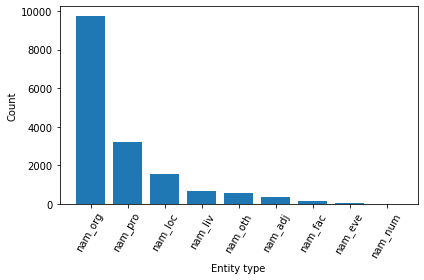

In [8]:
import matplotlib.pyplot as plt
plt.bar(entities_all__names, entities_all__count)
plt.xlabel("Entity type")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Display 10 most frequent Named Entities for each coarse-grained type.

In [ ]:
entities_all

In [9]:
for name in freq_entities_all.keys():
    print(f"TYPE {name}:")
    
    entities_filtered = [entity[0] for entity in sentence_based_entities if get_entity(entity) == name]
    ef_counter = Counter(entities_filtered)
    print(ef_counter)
    for entity, count in ef_counter.most_common(10):
        print(f"  -{entity} [{count}]")

TYPE nam_pro:
Counter({'dzieje_(apostolskie) . u .': 1097, 'dziennik . u .': 438, 'dziennik . urz': 80, 'ordynacja podatkowy': 78, 'kodeks karny': 68, 'monitor polska': 62, 'sprawa wewnętrzny': 51, 'kodeks postępowanie cywilny': 41, 'kodeks postępowanie administracyjny': 40, 'kodeks postępowanie karny': 36, 'kodeks cywilny': 27, 'konwencja': 27, 'natura 2000': 26, 'kodeks handlowy': 19, 'kodeks spółka handlowy': 18, 'ustawa z dzień 26 listopad 1998 r . o finanse publiczny': 14, 'dziennik urzędowy': 14, 'ustawa z dzień 13 październik 1998 r . o system ubezpieczenie społeczny': 14, 'prawo wodny': 13, 'ustawa z dzień 30 sierpień 1991 r . o zakład opieka zdrowotny': 13, 'kodeks karny wykonawczy': 12, 'konstytucja rzeczpospolita polski': 11, 'dziennik': 11, 'ustawa z dzień 26 lipiec 1991 r . o podatek dochodowy od osoba fizyczny': 11, 'ustawa z dzień 21 listopad 1967 r . o powszechny obowiązek obrona rzeczpospolita polski': 11, 'ustawa z dzień 24 sierpień 1991 r . o ochrona przeciwpożarowy'

## Display 50 most frequent Named Entities including their count and fine-grained type.

In [ ]:
fine_graied_entities = [(entity[0], entity[2]) for entity in sentence_based_entities]
Counter(fine_graied_entities).most_common(50)

[(('dzieje_(apostolskie) . u .', 'nam_pro_media_periodic'), 1097),
 (('rzeczpospolita polski', 'nam_loc_gpe_country'), 815),
 (('dziennik . u .', 'nam_pro_media_periodic'), 438),
 (('skarb państwo', 'nam_org_institution'), 410),
 (('złoty', 'nam_oth_currency'), 334),
 (('minister sprawiedliwość', 'nam_org_institution'), 322),
 (('unia europejski', 'nam_org_organization'), 296),
 (('minister obrona narodowy', 'nam_org_institution'), 287),
 (('rada minister', 'nam_org_institution'), 279),
 (('państwowy komisja wyborczy', 'nam_org_institution'), 267),
 (('prezes rad minister', 'nam_org_institution'), 264),
 (('minister finanse', 'nam_org_institution'), 234),
 (('państwowy straż pożarny', 'nam_org_organization'), 225),
 (('polski', 'nam_adj_country'), 204),
 (('prezes urząd', 'nam_org_institution'), 201),
 (('urząd patentowy', 'nam_org_institution'), 196),
 (('urząd ochrona państwo', 'nam_org_institution'), 181),
 (('euro', 'nam_oth_currency'), 118),
 (('sąd najwyższy', 'nam_org_institutio

## Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color. (For demo application Streamlit might be useful for displaying NER results).

In [ ]:
sentences_2_ent = []

for act_id, entities in acts_entities_n82.items():
    act_sentences = {}
    
    for entity in entities:
      print(entity)
      e_base, e_orth, e_type, s_id = entity
      if s_id not in act_sentences.keys():
          act_sentences[s_id] = set()
      act_sentences[s_id].add(e_type)
    
    for s_id, types_set in act_sentences.items():
        if len(types_set) >= 2:
            sentences_2_ent.append((act_id, s_id))
# sentences_2_ent

In [17]:
!pip install termcolor



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)
  
text = 'Hello, World'
colored_text = colored(255, 0, 0, text)
print(colored_text)

#or

print(colored(255, 0, 0, 'Hello, World'))

Hello, World 
Hello, World 


In [31]:
acts_n82_dir = Path("./ner_ustawy/")
def find_and_parse_sentence(act_id, s_id):
    # print(act_id)
    # path_dir = Path("./ner_ustawy/")
    act = acts_n82_dir / f"{act_id}.txt"
#
    # act = path_dir+ f"{act_id}.txt"
    content = act.read_text(encoding="utf8")
    tree = ET.fromstring(text=content)
    
    tokens = []
    for sentence in tree.iter("sentence"):
        if sentence.attrib["id"] == s_id:
            tokens = [token.find("orth").text for token in sentence.iter("tok")]
    
    entities = []
    for entity in acts_entities_n82[act_id]:
        e_base, e_orth, e_type, sentence_id = entity
        if sentence_id == s_id:
            entities.append((e_orth, e_type))
    
    return tokens, entities 

import spacy
from spacy import displacy
# blank language model
nlp = spacy.blank("pl")

def color_entities(tokens, entities):
    sentence = " ".join(tokens)

    
    doc = nlp.make_doc(sentence)
    ents = []
    for entity in entities:
        e_orth, e_type = entity
        start = sentence.index(e_orth)
        stop = start + len(e_orth)
        ents.append(doc.char_span(start, stop, label=e_type))
    
    doc.ents = ents
    colors = {'nam_pro_media_periodic': "#85C1E9","nam_pro_title_document":'#CCFFE5', 'nam_pro_title_document':'#FFE5CC','nam_org_company':'#FF6666',
              'nam_org_organization':'CCE5FF', 'nam_liv_person':'#FF007F', 'nam_org_company':"#FFFFCC", 'nam_org_institution':'#2000C1',
              "nam_loc_gpe_country ": "#ff6961" ,'nam_org_institution':"#4E0000", 'nam_loc_gpe_country':'#FFCCFF'}
    options = {"ents": ['nam_pro_title_document',
                        'nam_pro_title_document',
                        'nam_org_institution',
                        'nam_org_company',
                        'nam_liv_person',
                        'nam_org_organization',
                        'nam_pro_media_periodic', 
                        'nam_loc_gpe_country', 
                        'nam_org_institution',
                        'nam_loc_gpe_country'], "colors": colors}

    displacy.render(doc, style="ent", options=options, jupyter=True)
        
import random

for act_id, s_id in random.sample(sentences_2_ent, 5):
    tokens, entities = find_and_parse_sentence(act_id=act_id, s_id=s_id)
    print(entities)
  
    color_entities(tokens=tokens, entities=entities)
    print("========")
    # break

[('ustawie z dnia 5 sierpnia 2010 r . o ochronie informacji niejawnych', 'nam_pro_title_document'), ('Dz . U .', 'nam_pro_media_periodic'), ('Agencji Wywiadu', 'nam_org_institution'), ('Biura Ochrony Rządu', 'nam_org_institution'), ('Komendanta Głównego Policji', 'nam_org_institution'), ('Dyrektora Generalnego Służby Więziennej', 'nam_org_institution'), ('Komendanta Głównego Straży Granicznej', 'nam_org_institution'), ('Inspektora Nadzoru Wewnętrznego', 'nam_org_institution'), ('Inspektorowi Nadzoru Wewnętrznego', 'nam_org_institution')]


[('ustawie z dnia 22 sierpnia 1997 r . o pracowniczych programach emerytalnych', 'nam_pro_title_document'), ('Dz . U .', 'nam_pro_media_periodic')]


[('Rada Ministrów', 'nam_org_institution'), ('Rzeczypospolitej Polskiej', 'nam_loc_gpe_country')]


[('Funduszu Gwarantowanych Świadczeń Pracowniczych', 'nam_org_organization'), ('Funduszu Pracy', 'nam_org_institution')]


[('Prawo farmaceutyczne', 'nam_pro_title_document'), ('Dz . U .', 'nam_pro_media_periodic')]


Answer the following questions:

Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?
- NER, ponieważ daje bardziej szczegółowe informacje (o kategoriach) i jest to narzędzie, które zostało do tego domyślnie przeznaczone. Otrzymane 50 najczęstszych wyrażeń jest lepsze niż w przypadku capital letters

What are the drawbacks of the method based on capital letters?
- Nie mamy podziału na poszczególne kategorie.  Duzo rzeczy do odfiltrowania

What are the drawbacks of the method based on NER?
 - Pojawiają się zduplikowane wpisy wynikające z innej formy fleksyjnej
Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?
- najlepsze wyniki ma grupa nam_org, co może wynikać z tego, że jest najczęściej spotykana w korpusie. Najgorsze wyniki można zaobserwować dla grupy nam_num, ponieważ bardzo dziwne jest klasyfikowanie liczby jako jednostki nazwanej samodzielnie, a nie z jednostką, która jest numerowana.

Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?
- asystent glosowy
